In [1]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1 - Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Athpr123/Binary-Classification-Using-Machine-learning/master/dataset.csv", sep=",")

df


,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62283,36315,36,EPX,Travel Agency,0.00,HONG KONG,Online,17,NaN,28.0,2 way Comprehensive Plan,0
62284,2511,56,JZI,Airlines,9.10,AUSTRALIA,Online,9,F,26.0,Basic Plan,0
62285,16874,36,EPX,Travel Agency,0.00,ITALY,Online,216,NaN,20.0,2 way Comprehensive Plan,1
62286,14801,29,CWT,Travel Agency,11.88,AUSTRALIA,Online,37,NaN,19.8,Rental Vehicle Excess Insurance,1


In [2]:
print(df["Age"])

0        28
1        37
2        27
3        36
4        26
         ..
62283    36
62284    56
62285    36
62286    29
62287    44
Name: Age, Length: 62288, dtype: int64


In [3]:
print(df["Claim"])

0        1
1        0
2        0
3        0
4        0
        ..
62283    0
62284    0
62285    1
62286    1
62287    0
Name: Claim, Length: 62288, dtype: int64


In [4]:
print(df.columns)

Index(['ID', 'Age', 'Agency', 'Agency Type', 'Commision (in value)',
       'Destination', 'Distribution Channel', 'Duration', 'Gender',
       'Net Sales', 'Product Name', 'Claim'],
      dtype='object')


In [5]:
df[["Age", "Agency", "Agency Type"]]

,Age,Agency,Agency Type
0,28,C2B,Airlines
1,37,JZI,Airlines
2,27,EPX,Travel Agency
3,36,EPX,Travel Agency
4,26,CWT,Travel Agency
...,...,...,...
62283,36,EPX,Travel Agency
62284,56,JZI,Airlines
62285,36,EPX,Travel Agency
62286,29,CWT,Travel Agency


In [6]:
df[["Age", "Agency", "Agency Type"]].values

array([[28, 'C2B', 'Airlines'],
       [37, 'JZI', 'Airlines'],
       [27, 'EPX', 'Travel Agency'],
       ...,
       [36, 'EPX', 'Travel Agency'],
       [29, 'CWT', 'Travel Agency'],
       [44, 'EPX', 'Travel Agency']], dtype=object)

In [7]:
TOTAL_SIZE = len(df)
TRAIN_SIZE = int(TOTAL_SIZE * 0.6)
VAL_SIZE = int(TOTAL_SIZE * 0.2)
TEST_SIZE = int(TOTAL_SIZE * 0.2)

#print(TOTAL_SIZE)
#print(TRAIN_SIZE)
#print(VAL_SIZE)
#print(TEST_SIZE)

# Step 2 - Split dataset into training, validation, and test splits
X_todo, X_test, y_todo, y_test = train_test_split(df[["Age", "Commision (in value)", "Duration",
       "Net Sales"]].values, df["Claim"].values, test_size=TEST_SIZE, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_todo, y_todo, test_size=VAL_SIZE, random_state=0)

In [8]:
# To make sure that everything is correct and also to get an overview of the
# dimensions of the data, we print out the shapes of each variable.
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_val:", y_test.shape)


X_train: (37374, 4) y_train: (37374,)
X_val: (12457, 4) y_val: (12457,)
X_test: (12457, 4) y_val: (12457,)


In [9]:
X_train.min()

-389.0

In [10]:
X_train.max()

4857.0

In [11]:
y_train.min()

0

In [12]:
y_train.max()

1

In [13]:
X_train[0]

array([36.,  0.,  6., 22.])

In [14]:
y_train[0]

0

In [15]:
# Step 3 - Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
# Notice that after the transformation the type of the inputs will change from integer to float.
X_train.dtype

dtype('float64')

In [17]:
X_train.min()

-6.962173152425455

In [18]:
X_train.max()

42.2499724594282

In [19]:
import tensorflow.keras as keras

# We set the random seed to 0
keras.utils.set_random_seed(0)

n_classes = 2

# We apply one-hot encoding using the to_categorical Keras function.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [20]:
# We can see that after the transformation, each row has been transformed.
# Notice how the first element, which was previously 5, is now all zeroes
# except for the 6th column. The same logic is true for the other rows as
# well.
y_train[0:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Building the network

Now, we can finally start building our neural network. For this, we will use the Sequential class of the keras library, which makes building neural networks really easy.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# The neural network will have 2 hidden layers in total, each with 512-512
# neurons.
model = Sequential([
    Dense(units=32, activation="relu", input_shape=(4,)),
    Dropout(0.5),
    Dense(units = 32, activation="relu"),
    Dropout(0.5),
    Dense(units = 32, activation="relu"),
    Dense(units = n_classes, activation="softmax")
])

# Lastly, we also need to compile the model, which is the same as saying
# that we specify the loss and metric used during training.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003), loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
# We can now print the summary of the model, which tells us how many
# layers there are in the model and how many neurons each one has.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2338 (9.13 KB)
Trainable params: 2338 (9.1

In [23]:
# We can now train the model using the .fit() function.
history = model.fit(
    X_train, y_train, epochs=10, verbose=1, validation_data=(X_val, y_val), batch_size=32
)

Epoch 1/10
1168/1168 [==============================] - 1s 630us/step - loss: 0.4434 - accuracy: 0.8140 - val_loss: 0.4144 - val_accuracy: 0.8178
Epoch 2/10
1168/1168 [==============================] - 1s 562us/step - loss: 0.4181 - accuracy: 0.8219 - val_loss: 0.4012 - val_accuracy: 0.8238
Epoch 3/10
1168/1168 [==============================] - 1s 612us/step - loss: 0.4053 - accuracy: 0.8265 - val_loss: 0.4010 - val_accuracy: 0.8264
Epoch 4/10
1168/1168 [==============================] - 1s 567us/step - loss: 0.4020 - accuracy: 0.8280 - val_loss: 0.3917 - val_accuracy: 0.8305
Epoch 5/10
1168/1168 [==============================] - 1s 573us/step - loss: 0.3987 - accuracy: 0.8285 - val_loss: 0.3864 - val_accuracy: 0.8284
Epoch 6/10
1168/1168 [==============================] - 1s 583us/step - loss: 0.3966 - accuracy: 0.8299 - val_loss: 0.3894 - val_accuracy: 0.8303
Epoch 7/10
1168/1168 [==============================] - 1s 572us/step - loss: 0.3967 - accuracy: 0.8304 - val_loss: 0.3889 -

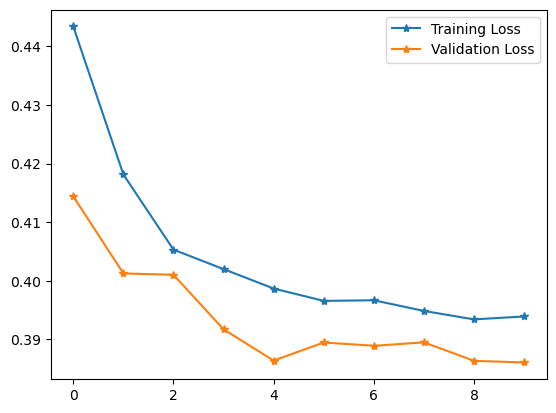

In [24]:
# After the training is done, it is time to check the training and validation
# losses. Both seem to have decreased over the epochs, which is a good sign.
plt.plot(history.history["loss"], "*-")
plt.plot(history.history["val_loss"], "*-")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

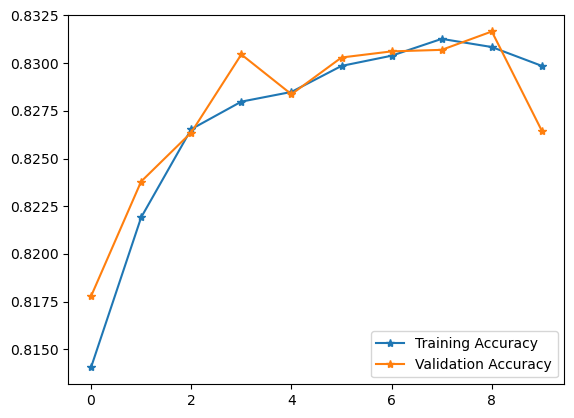

In [25]:
# If we check the accuracies, we will see a similar trend:
# both the training and validation accuracies have increased
# during training.
plt.plot(history.history["accuracy"], "*-")
plt.plot(history.history["val_accuracy"], "*-")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()